In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

### Information About DataSet

In [17]:
df=pd.read_csv('googleplaystore.csv')
print('Columns in Dataset: \n',df.columns)

Columns in Dataset: 
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [18]:
print('Shape of dataframe:\t',df.shape)

Shape of dataframe:	 (10841, 13)


In [19]:
print('Statistical analysis of Dataset: \n',df.describe(include='all'))

Statistical analysis of Dataset: 
            App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

    

In [20]:
print('Data Type of columns: \n',df.dtypes)

Data Type of columns: 
 App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [21]:
print('Information about the dataset :\n',df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
Information about the dataset :
 None


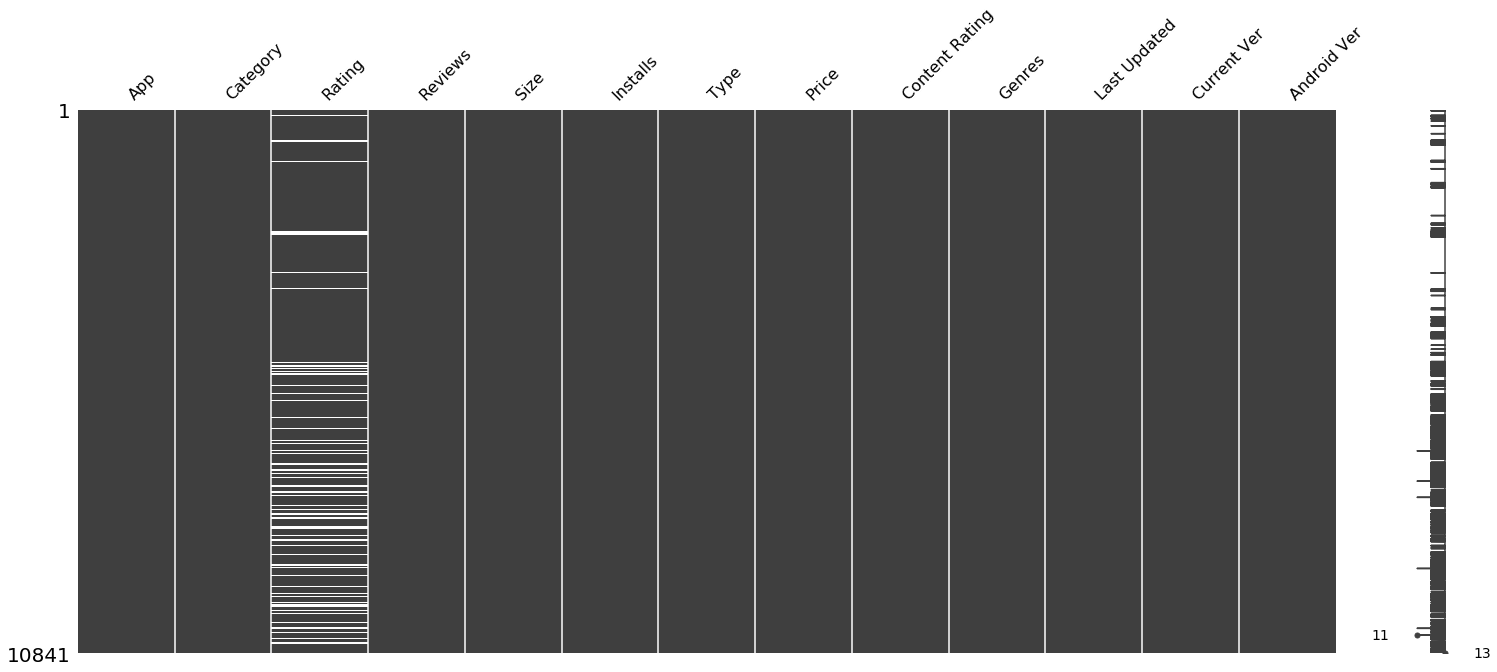

In [23]:
msno.matrix(df)  ;

## Cleaning data

### Category Column Cleaning

In [24]:
print(df.Category.unique())
unwanted_category = df[df.Category=='1.9']
print('no. of unwanted rows:\t',len(unwanted_category))
df = df.drop(unwanted_category.index)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
no. of unwanted rows:	 1


### Rating Column Cleaning

In [25]:
print('Before Cleaning Datatype:\t',df.Rating.dtypes)
print('Unique value of Reviews:\t',df.Rating.unique())
print('No. of null entry in rating column: \t',len(df[df.Rating.isnull()]))
df.Rating = df.Rating.fillna('0.0')
df.Rating = df['Rating'].astype('float')
mean = df.Rating.mean()
df.Rating = df.Rating.replace(0.0,mean)
print('No. of null entry in rating column after cleaning: \t',len(df[df.Rating.isnull()]))
print(df.Rating.dtypes)

Before Cleaning Datatype:	 float64
Unique value of Reviews:	 [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2]
No. of null entry in rating column: 	 1474
No. of null entry in rating column after cleaning: 	 0
float64


### Reviews Column Cleaning

In [26]:
print('Before Cleaning Datatype:\t',df.Reviews.dtypes)
print('Unique value of Reviews:\t',df.Reviews.unique())
print('no. of null entries:\t',len(df[df.Reviews.isnull()]))
unstructed = df[df.Reviews=='3.0M'].index
df.Reviews.loc[unstructed] = df.Reviews.loc[unstructed].str.replace('.0M','000000')
df.Reviews=df.Reviews.astype('int')
print('After Cleaning Datatype:\t',df.Reviews.dtypes)

Before Cleaning Datatype:	 object
Unique value of Reviews:	 ['159' '967' '87510' ... '603' '1195' '398307']
no. of null entries:	 0
After Cleaning Datatype:	 int32


### Size Column Cleaning

In [27]:
print('Before Cleaning Datatype:\t',df.Size.dtypes)
print('Unique value of Reviews:\t',df.Size.unique())
df.Size = df.Size.replace('Varies with device','0k')
contain_m = df[df.Size.str.contains('M')]['Size']
contain_m=contain_m.str.strip('M')
contain_m=contain_m.astype('float')
contain_m=contain_m*1024
contain_k = df[~df.Size.str.contains('M')]["Size"]
contain_k = contain_k.str.replace(',','').str.strip('k+').astype('float')
df.loc[contain_m.index,'Size']=contain_m
df.loc[contain_k.index,'Size']=contain_k
print(df.Size.unique())
print('After Cleaning Datatype:\t',df.Size.dtypes)

Before Cleaning Datatype:	 object
Unique value of Reviews:	 ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' 

### Install Column Cleaning

In [28]:
print(df.Installs.dtype)
print(df.Installs.isnull().any())
print(df.Installs.unique())
df.Installs=df.Installs.str.replace('Free','0+')
df.Installs=df.Installs.str.strip('+').str.replace(',','').astype('int')
print(df.Installs.unique())
print(df.Installs.dtypes)

object
False
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']
[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
  500000000         50        100        500         10          1
          5          0]
int32


### Types Column Cleaning 

In [29]:
print(df.Type.dtypes)
print(df.Type.unique())
print(len(df[df.Type.isnull()]))
df.Type=df.Type.fillna('Free')
unstructed=df.Type.str.contains('0').index
df.Type.loc[unstructed]=df.Type.loc[unstructed].str.replace('0','Free')
print(df.Type.dtypes)
print(df.Type.unique())
print(len(df[df.Type.isnull()]))


object
['Free' 'Paid' nan]
1
object
['Free' 'Paid']
0


### Price Column Cleaning

In [30]:
print(df.Price.dtypes)
print(df.Price.unique())
print(len(df[df.Price.isnull()]))
df.Price=df.Price.str.strip('$')
df.Price=df.Price.replace('Everyone','0').astype('float')
print(df.Price.dtypes)
print(df.Price.unique())
print(len(df[df.Price.isnull()]))

object
['0' '$4.99 ' '$3.99 ' '$6.99 ' '$1.49 ' '$2.99 ' '$7.99 ' '$5.99 '
 '$3.49 ' '$1.99 ' '$9.99 ' '$7.49 ' '$0.99 ' '$9.00 ' '$5.49 ' '$10.00 '
 '$24.99 ' '$11.99 ' '$79.99 ' '$16.99 ' '$14.99 ' '$1.00 ' '$29.99 '
 '$12.99 ' '$2.49 ' '$10.99 ' '$1.50 ' '$19.99 ' '$15.99 ' '$33.99 '
 '$74.99 ' '$39.99 ' '$3.95 ' '$4.49 ' '$1.70 ' '$8.99 ' '$2.00 ' '$3.88 '
 '$25.99 ' '$399.99 ' '$17.99 ' '$400.00 ' '$3.02 ' '$1.76 ' '$4.84 '
 '$4.77 ' '$1.61 ' '$2.50 ' '$1.59 ' '$6.49 ' '$1.29 ' '$5.00 ' '$13.99 '
 '$299.99 ' '$379.99 ' '$37.99 ' '$18.99 ' '$389.99 ' '$19.90 ' '$8.49 '
 '$1.75 ' '$14.00 ' '$4.85 ' '$46.99 ' '$109.99 ' '$154.99 ' '$3.08 '
 '$2.59 ' '$4.80 ' '$1.96 ' '$19.40 ' '$3.90 ' '$4.59 ' '$15.46 ' '$3.04 '
 '$4.29 ' '$2.60 ' '$3.28 ' '$4.60 ' '$28.99 ' '$2.95 ' '$2.90 ' '$1.97 '
 '$200.00 ' '$89.99 ' '$2.56 ' '$30.99 ' '$3.61 ' '$394.99 ' '$1.26 '
 '$1.20 ' '$1.04 ']
0
float64
[  0.     4.99   3.99   6.99   1.49   2.99   7.99   5.99   3.49   1.99
   9.99   7.49   0.99   9.    

### Content Rating Column Cleaning

In [31]:
print(df['Content Rating'].dtypes)
print(df['Content Rating'].unique())
print(len(df[df['Content Rating'].isnull()]))
df['Content Rating'] = df['Content Rating'].fillna('Everyone')
print(df['Content Rating'].dtypes)
print(df['Content Rating'].unique())
print(len(df[df['Content Rating'].isnull()]))

object
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
0
object
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']
0


### Last Updated Column Cleaning

In [32]:
print(df['Last Updated'].dtypes)
print(df['Last Updated'].unique())
print(len(df[df['Last Updated'].isnull()]))
df['Last Updated']=pd.to_datetime(df['Last Updated'])
print(df['Last Updated'].dtypes)



object
['7-Jan-18' '15-Jan-18' '1-Aug-18' ... '20-Jan-14' '16-Feb-14' '23-Mar-14']
0
datetime64[ns]


### Android Ver Column Cleaning

In [33]:
print(len(df['Android Ver']))
x=df["Android Ver"].str.strip(' and upW')
# print(x.unique())
y=x[x.isnull()].index
x.loc[y]='Varies with device'
z=x[x.str.contains('-')].index
x.loc[z]='Varies with device'
df['Android Ver']=x
df['Android Ver'].unique()

10840


array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1',
       '1.0'], dtype=object)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null int32
Size              10840 non-null object
Installs          10840 non-null int32
Type              10840 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null datetime64[ns]
Current Ver       10832 non-null object
Android Ver       10840 non-null object
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.4+ MB


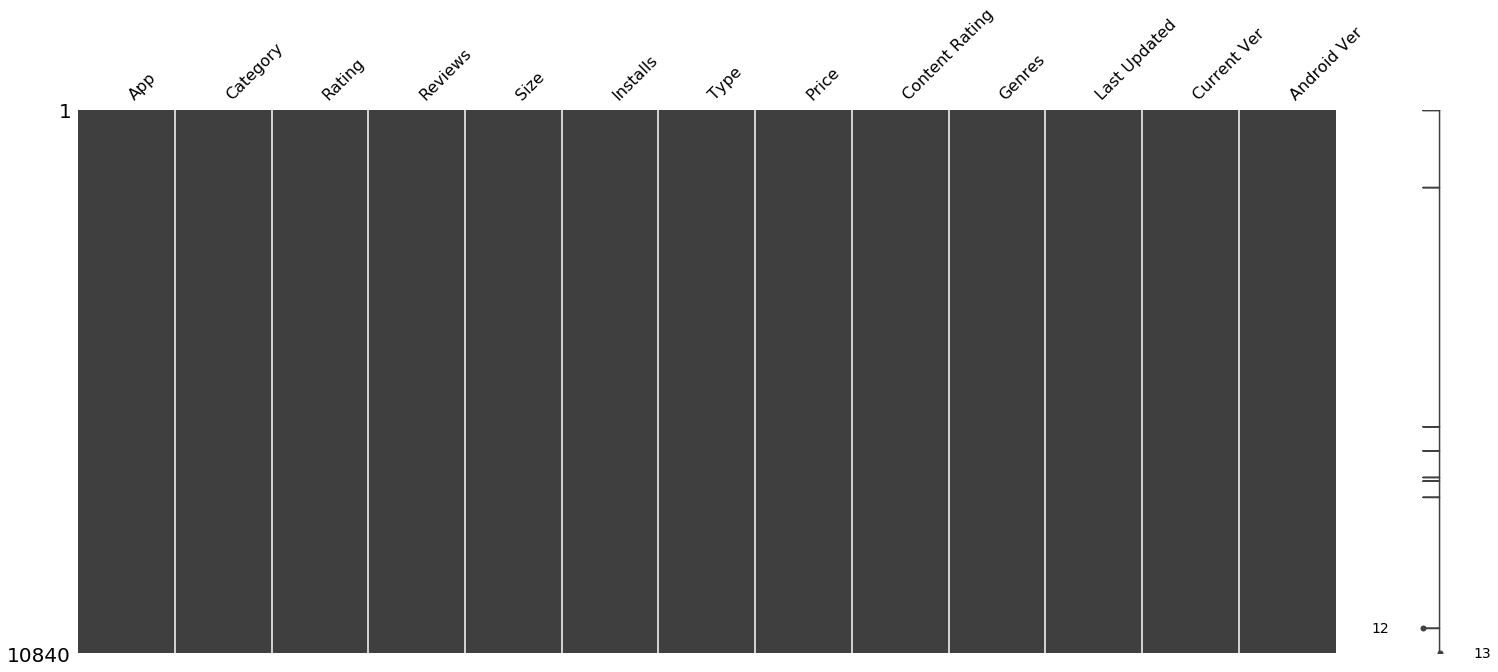

In [35]:
msno.matrix(df)  

In [38]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10840,10840,10840.000000,1.084000e+04,10840.0,1.084000e+04,10840,10840.000000,10840,10840,10840,10832,10840
unique,9659,33,NaN,NaN,460.0,NaN,2,NaN,6,119,1377,2783,25
top,ROBLOX,FAMILY,NaN,NaN,0.0,NaN,Free,NaN,Everyone,Tools,2018-08-03 00:00:00,Varies with device,4.1
freq,9,1972,NaN,NaN,1695.0,NaN,10040,NaN,8714,842,326,1459,2451
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-21 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-08 00:00:00,NaN,NaN
mean,NaN,NaN,4.114252,4.441529e+05,NaN,1.546434e+07,NaN,1.027368,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.517228,2.927761e+06,NaN,8.502936e+07,NaN,15.949703,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.700000,3.800000e+01,NaN,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [40]:
df.to_csv('GPS Cleaned.csv')

### Highest paid app

In [ ]:
df.Price.unique()
df.Price=df.Price.replace('Everyone','0')
#df['Price']= df['Price'].apply(lambda x :x.replace('$','') if '$' in x else x)
df['Price']=df.Price.astype(float)
df.Price.unique()
df[df.Price == df.Price.max()]['App'].tolist()


### Lowest paid app

In [ ]:
#df[df.Price==df.Price.min()]['App'].tolist()
df.Price.unique()
df[df.Price==1.0]['App'].tolist()

### App Having Highest Reviews 

In [ ]:
df.Reviews.unique()
df['Reviews']=pd.to_numeric(df['Reviews'])
df[df['Reviews'] == df['Reviews'].max()]['App'].tolist()

In [ ]:
ds=pd.read_csv('googleplaystore.csv')
ds.Installs=ds.Installs.replace(to_replace=['Free','0'],value='0+')

#ds[ds.Installs == ds['Installs'].max()]['App']

### Size vs Price

In [ ]:
df.Price=df.Price.replace('Everyone','0')
df.Price=df.Price.apply(lambda x: float(x.strip('$ ')))
print(df.Price.unique())

In [ ]:
def convert_size(x):
    if 'M' in x:
        x=x.str.replace('M','')
        x=x*1024
    else:
        x=x.str.strip('k+').replace(',','')

In [ ]:

df.Size=df.Size.replace('Varies with device','0k')        
df.Size = df.apply(convert_size) 
df.Size.unique()
#df.Price.unique()

In [ ]:
df=pd.read_csv('googleplaystore.csv')
contain_m = df[df.Size.str.contains('M')]['Size']
contain_m=contain_m.str.strip('M')
contain_m=contain_m.astype('float')
contain_m=contain_m*1024
#print(contain_m.index)

In [ ]:
df=pd.read_csv('googleplaystore.csv')
df.Size = df.Size.replace('Varies with device','0k')
contain_k = df[~df.Size.str.contains('M')]["Size"]
contain_k = contain_k.str.replace(',','').str.strip('k+').astype('float')
#print(contain_k.index)

In [ ]:
df.loc[contain_m.index,'Size']=contain_m
df.loc[contain_k.index,'Size']=contain_k
Size=df.Size.loc[df.Price>0]

In [ ]:
df=pd.read_csv('googleplaystore.csv')
df.Price=df.Price.str.strip('$')
df.Price=df.Price.replace('Everyone','0').astype('float')
Price=df.Price.loc[df.Price>0]
Price.count()

In [ ]:
plt.scatter(Size,Price)
plt.grid()
plt.xlabel('Size (in kb)')
plt.ylabel('Price (in $)')
plt.show()


## Category vs Rating

**Cleaning Data**

In [ ]:
df=pd.read_csv('googleplaystore.csv',usecols=['Category','Rating'])
df.Rating=df.Rating.fillna(0)
print(df.Rating.unique())
df=df.drop(df[df.Category=='1.9'].index)
print(df.Category.unique())

### Statistical Relationship 

In [ ]:
df=df.groupby('Category').mean()
df=df.sort_values(by='Rating')
print('Maximun Rating Category :',df[df.Rating==df.Rating.max()].index.tolist())
print('Minimum Rating Category :',df[df.Rating==df.Rating.min()].index.tolist())

### Visualization 